In [1]:
%matplotlib inline

# 3 - Dynamic Connectivity

In this short tutorial, we will build and expand on the previous tutorials by computing the dynamic connectivity, using Time-Varying Functional Connectivity Graphs.

In the near future, the standard method of "sliding window" will be supported.

- - -

### Load data

In [2]:
import numpy as np

In [3]:
import scipy
from scipy import io

In [4]:
eeg = np.load("data/eyes_opened.npy")

num_trials, num_channels, num_samples = np.shape(eeg)

In [5]:
eeg1 = np.squeeze(eeg[0, :, :])

### Dynamic connectivity

As a first example, we are going to compute the static connectivity of the EEG signals using the IPLV estimator.

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from dyconnmap import tvfcg
from dyconnmap.fc import IPLV

First, setup the configuration options
* frequency band, `fb`
* sampling frequency, `fs`
* cycle-criterion, `cc`
* steping samples, `step`

In [7]:
fb = [1.0, 4.0]
cc = 3.0
fs = 160.0
step = 32

Declare and instantiate which estimator we will use to compute the dynamic connectivity. In this case we use again IPLV.

*** Notice *** As you might have noticed, the following line intantiates an object. We only need to pass two parameters, the `fb` and `fs`.

In [8]:
estimator = IPLV(fb, fs)

Now we are ready to estimate the dynamic functional connectivity.

In [9]:
fcgs = tvfcg(eeg1, estimator, fb, fs, cc, step)

In [10]:
num_fcgs, num_channels, num_channels = np.shape(fcgs)

In [11]:
print("{0} FCGs of shape {1}x{2}".format(num_fcgs, num_channels, num_channels))

285 FCGs of shape 64x64


In [12]:
print("FCGs array data type is {0}".format(fcgs.dtype))

FCGs array data type is complex128


Because of the nature of the estimator, notice the FCG's data type; for compatibility reasons, it is `np.complex128`. We have to use `np.real` to get the real part.

In [13]:
rfcgs = np.real(fcgs)

### Plot

Plot a few FCGs using the standard Matplotlib functions

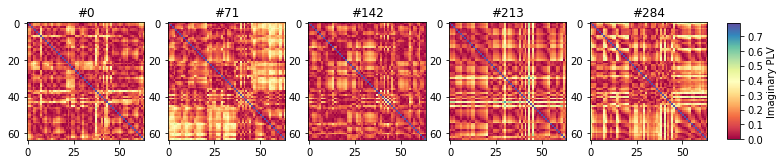

In [14]:
import matplotlib.pyplot as plt

slices = np.linspace(0, num_fcgs - 1, 5, dtype=np.int32)
num_slices = len(slices)

mtx_min = 0.0
mtx_max = np.max(rfcgs)

f, axes = plt.subplots(ncols=num_slices, figsize=(14, 14))
for i, s in enumerate(slices):
    slice_mtx = rfcgs[s, :, :] + rfcgs[s, :, :].T
    np.fill_diagonal(slice_mtx, 1.0)
    cax  = axes[i].imshow(slice_mtx, vmin=mtx_min, vmax=mtx_max, cmap=plt.cm.Spectral)
    axes[i].set_title('#{0}'.format(s))

# move the colorbar to the side ;)
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.82, 0.445, 0.0125, 0.115])
cb = f.colorbar(cax, cax=cbar_ax)
cb.set_label('Imaginary PLV')